In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from textblob import TextBlob

In [ ]:
# link gsmarena
link = "https://www.gsmarena.com/xiaomi_12_pro-reviews-11287.php", 'https://www.gsmarena.com/samsung_galaxy_s22_ultra_5g-reviews-11251.php'

In [ ]:
# Get Content
def get_content(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'}
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.content, 'html.parser')
    return soup

In [ ]:
# Get Last Index of Page Number
def get_last_page(url):
    soup = get_content(url)
    page_number = soup.find(id="user-pages")
    pages = page_number.find_all("a")
    last_page = pages[len(pages) - 2].get_text()
    return int(last_page.replace(",",""))

In [ ]:
# get comment in the website
from time import sleep


text = [];

def get_reviews(url):
    last_page = get_last_page(url)
    sleep(3)
    try:
        for page in range(1, last_page + 1):
            print(f"Scrapping page {page}")
            soup = get_content('https://www.gsmarena.com/xiaomi_12_pro-reviews-11287p'+ str(page) +'.php')
            reviews = soup.find(id="all-opinions")
            sleep(2)
            content = reviews.find_all("p", class_="uopin")
            text.append(content)
        return content
    except:
        pass
    # soup = get_content(url)
    # reviews = soup.find(id="all-opinions")
    # content = reviews.find_all("p", class_="uopin")
    # text.append(content)
    # return content

In [ ]:
import re

# def clean_text(html):
#     return re.sub('<[^>]*>', '', str(html))
    # get text after "... more"
    # res = res.split("... more")[1]

In [ ]:
# Get Comment and Store in a variable list
all_html = get_reviews(link)
text2 = []
for x in text:
    text2.extend(x)

text3 = []
for xm in text2:
    clean = xm.get_text()
    text3.append(clean)
# print(all_html)



Scrapping page 1
Scrapping page 2
Scrapping page 3
Scrapping page 4
Scrapping page 5
Scrapping page 6
Scrapping page 7
Scrapping page 8
Scrapping page 9
Scrapping page 10
Scrapping page 11
Scrapping page 12
Scrapping page 13
Scrapping page 14
Scrapping page 15
Scrapping page 16
Scrapping page 17
Scrapping page 18
Scrapping page 19
Scrapping page 20
Scrapping page 21
Scrapping page 22
Scrapping page 23
Scrapping page 24
Scrapping page 25
Scrapping page 26
Scrapping page 27
Scrapping page 28
Scrapping page 29
Scrapping page 30
Scrapping page 31
Scrapping page 32
Scrapping page 33
Scrapping page 34
Scrapping page 35
Scrapping page 36
Scrapping page 37


In [ ]:
text3

["martin, 13 Dec 2022Xiaomi mi 12 is ip 68 and is WATERPROOFI'm certain that it definitely has basic ip52/53 resistance... Not sure about waterproof though, no phone in the world is completely waterproof. Water resistant? Yes. But waterproof? No.",
 'Xiaomi mi 12 is ip 68 and is WATERPROOF',
 "Eudaemon., 11 Dec 2022Yup... It does have paper mode option That's great. I wish listed this device . 😊",
 'Anonymous, 11 Dec 2022Does it have paper mode in display settings.?\r\n\r\nI am on mi 10t. I love paper mode.Yup... It does have paper mode option ',
 'n9xx, 04 Oct 2022Any "no" in the specifications is a deal breaker for meWould you still say no if iphone 16 display type have "no"? On gsmarena xD',
 'Does it have paper mode in display settings.?\n \r\nI am on mi 10t. I love paper mode.',
 "137, 30 Nov 2022Why have this if you can have Note 10 Pro that works better in almost all aspects? Because it's a way worse phone in every aspect? You're comparing a mid range phone to a flagship.",
 'Wh

In [ ]:
# Dataframe the dataset from crawl
df = pd.DataFrame(text3, columns=['text'])
df.shape

(725, 1)

In [ ]:
df.head(10)

,text
0,"martin, 13 Dec 2022Xiaomi mi 12 is ip 68 and i..."
1,Xiaomi mi 12 is ip 68 and is WATERPROOF
2,"Eudaemon., 11 Dec 2022Yup... It does have pape..."
3,"Anonymous, 11 Dec 2022Does it have paper mode ..."
4,"n9xx, 04 Oct 2022Any ""no"" in the specification..."
5,Does it have paper mode in display settings.?\...
6,"137, 30 Nov 2022Why have this if you can have ..."
7,Why have this if you can have Note 10 Pro that...
8,"Tj, 12 Oct 2022All my excitement went in vain...."
9,"Nicky , 19 Nov 2022What do you mean here pleas..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    725 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [ ]:
df.isnull().sum()

text    0
dtype: int64

In [ ]:
# df to csv
df.to_csv('xiaomi_12_pro.csv', index=False)

In [ ]:
df.tail(10)

,text
715,Downgrade toward mi11 pro
716,Battery should be at least 5000 mAh... Slimnes...
717,"Looks promising, but i go 1 more year with my ..."
718,very good flaship but the battery is small an...
719,and it costs $750
720,Is that actually what the phone looks like? Lo...
721,"Looking very good flaship comes with, \r\n ..."
722,How much approx it would be?
723,Nothing special.
724,"I was interested in the 50MP telephoto, but th..."


In [ ]:
# checking duplicates
df = pd.read_csv('xiaomi_12_pro.csv')
df.duplicated().sum()

2

In [ ]:
df.describe().T

,count,unique,top,freq
text,725,723,"phred, 29 Dec 2021No 3.5mm jack, no SD card sl...",2


In [ ]:
df

,text
0,"martin, 13 Dec 2022Xiaomi mi 12 is ip 68 and i..."
1,Xiaomi mi 12 is ip 68 and is WATERPROOF
2,"Eudaemon., 11 Dec 2022Yup... It does have pape..."
3,"Anonymous, 11 Dec 2022Does it have paper mode ..."
4,"n9xx, 04 Oct 2022Any ""no"" in the specification..."
...,...
720,Is that actually what the phone looks like? Lo...
721,"Looking very good flaship comes with, \r\n ..."
722,How much approx it would be?
723,Nothing special.


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# make space between words
# df['text'] = df['text'].apply(lambda x: re.sub(r'([a-z])([A-Z])', r'\1 \2', x))
# df['text'] = df['text'].apply(lambda x: re.sub(r'([A-Z])([A-Z][a-z])', r'\1 \2', x))

# Data Cleaning
def clean_text(text):
    # split text into words
    tokens = text.split()
    # remove punctuation from each word
    table = str.maketrans('', '', ' ')
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    # remove stop words
    stop_words = set(stopwords.words('english'))
    # remove month names
    stop_words.update(['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
    tokens = [w for w in tokens if not w in stop_words]
    # join all
    return ' '.join(tokens)
# df['Cleaned_Text'] = df['text'].apply(clean_text)
# df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# to csv cleaned text
df.drop('text', axis=1, inplace=True)
df.to_csv('xiaomi_12_pro_cleaned.csv', index=False)

In [ ]:
df = pd.read_csv('samsung_galaxy_s22_ultra_5g_cleaned.csv')
df.head(10)

,Cleaned_Text
0,replaced sim failing new gives two dual turn s...
1,daemon hours ago google even let users downgra...
2,android vs point android google even let users...
3,getting switched back phone trying use android xd
4,thickness bothers u man flagship thick make ex...
5,anyone confirm version physical sim bothered y...
6,anyone confirm version physical sim bothered e
7,would like see ultra lesser specs display lite...
8,would like see ultra lesser specs display note...
9,steve different different android really moren...


In [ ]:
# Sentiment Analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
df['Cleaned_Text'] = df['Cleaned_Text'].astype(str)
df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)
df.head(10)

,Cleaned_Text,Sentiment
0,replaced sim failing new gives two dual turn s...,0.068182
1,daemon hours ago google even let users downgra...,0.053333
2,android vs point android google even let users...,-0.008333
3,getting switched back phone trying use android xd,0.000000
4,thickness bothers u man flagship thick make ex...,-0.116667
5,anyone confirm version physical sim bothered y...,0.000000
6,anyone confirm version physical sim bothered e,0.000000
7,would like see ultra lesser specs display lite...,-0.333333
8,would like see ultra lesser specs display note...,0.400000
9,steve different different android really moren...,0.066667


In [ ]:
# label sentiment
def get_label(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
# df['Label'] = df['Sentiment'].apply(get_label)
# df

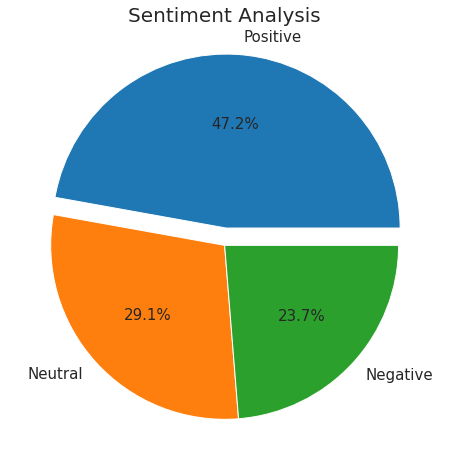

In [ ]:
# Vizualizing the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Pie Chart
df['Label'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), fontsize=15, explode=(0.1, 0, 0))
plt.title('Sentiment Analysis', fontsize=20)
plt.ylabel('')
plt.show()


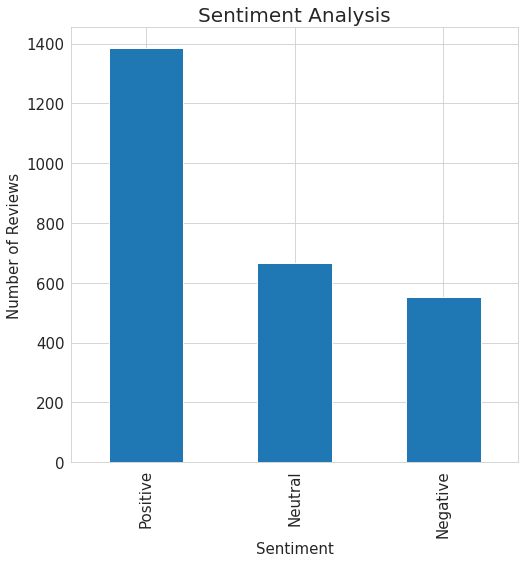

In [ ]:
# Bar Chart
df['Label'].value_counts().plot.bar(figsize=(8, 8), fontsize=15)
plt.title('Sentiment Analysis', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=15)
plt.xlabel('Sentiment', fontsize=15)
plt.show()

In [ ]:
# Word Cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

# WordCloud For all Sentiment
# show_wordcloud(df['Cleaned_Text'])

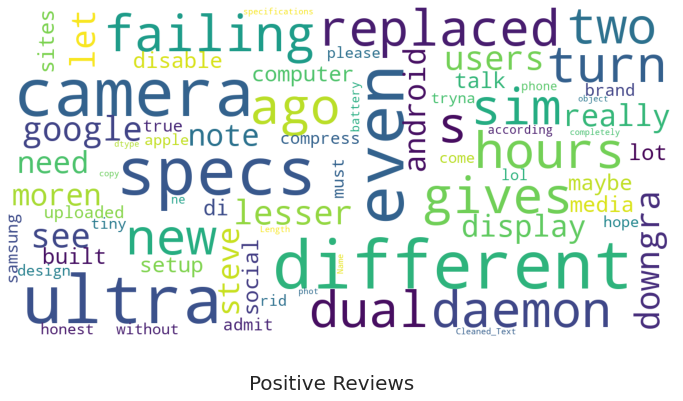

In [ ]:
# Word Cloud Positive for gsmarena crawl
show_wordcloud(df[df['Label'] == 'Positive']['Cleaned_Text'], title = 'Positive Reviews')


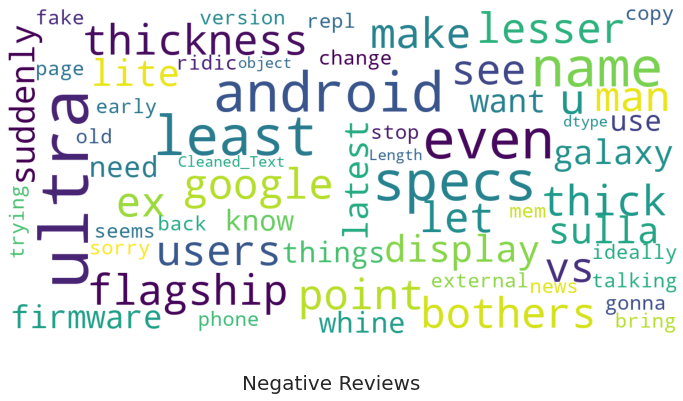

In [ ]:
# Word Cloud Negative for gsmarena crawl
show_wordcloud(df[df['Label'] == 'Negative']['Cleaned_Text'], title = 'Negative Reviews')

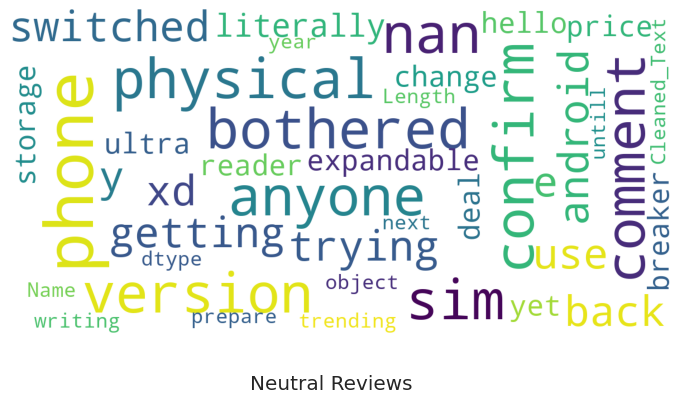

In [ ]:
# Word Cloud Neutral for gsmarena crawl
show_wordcloud(df[df['Label'] == 'Neutral']['Cleaned_Text'], title = 'Neutral Reviews')

## Accuracy

In [ ]:
# Translate the data to english and get sentiment polarity and label
from textblob import TextBlob
df = pd.read_csv('samsung_cleaned_tweet.csv')
df['Cleaned_Text'] = df['Cleaned_Text'].astype(str)

labels = []
for kalimat in df['Cleaned_Text']:
  analysis = TextBlob(kalimat)
  # analysis = str(analysis)
  try:
    english_text = analysis.translate(from_lang='id', to='en')
  except:
    pass
  # english_text = str(english_text)
  # print(english_text)
  analysis_sentiment = english_text.sentiment.polarity
 
  if analysis_sentiment < 0:
    labels.append("Negative")  
  elif analysis_sentiment > 0:
    labels.append("Positive")
  else :
   labels.append("Neutral")

df["Label"] = labels


df.head(10)

,Cleaned_Text,Label
0,samsung galaxy ultra vs sony xperia vs iphone ...,Neutral
1,samsung,Neutral
2,samsung galaxy ultra,Neutral
3,samsung galaxy ultra,Neutral
4,samsung ultra,Neutral
5,walaupun ga ada di list ttp paling suka samsun...,Positive
6,faktanya kamera samsung ultra telah berhasil m...,Neutral
7,ga ada samsung ultra,Neutral
8,samsung ultra ajaaahh,Neutral
9,buka jasa sewa samsung galaxy ultra yang kamer...,Neutral


In [ ]:
# Re-organizing Data
df1 = pd.read_csv('samsung_all_source.csv')
df1.replace('neutral', 'Neutral', inplace=True)
df1.replace('positive', 'Positive', inplace=True)
df1.replace('negative', 'Negative', inplace=True)

df1['Label'].value_counts()

Positive    1552
Neutral     1019
Negative     635
Name: Label, dtype: int64

In [ ]:
df1['Label'].value_counts()

Positive    1552
Neutral     1019
Negative     635
Name: Label, dtype: int64

In [ ]:
df = pd.read_csv('xiaomi_all_source.csv')
df['Label'].value_counts()

Positive    568
Neutral     380
Negative    203
Name: Label, dtype: int64

In [ ]:
# Evaluating the Xiaomi sentiment
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# split data
X = df['Cleaned_Text'].astype(str)
y = df['Label'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# vectorize
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

# model
model = MultinomialNB()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)


In [ ]:
# accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred)*100)

# precision
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))

# recall
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))

# f1
print('F1: ', f1_score(y_test, y_pred, average='weighted'))

print(classification_report(y_test, y_pred))

Accuracy:  63.63636363636363
Precision:  0.6209725617226767
Recall:  0.6363636363636364
F1:  0.6098390964496069
              precision    recall  f1-score   support

    Negative       0.50      0.21      0.29        34
     Neutral       0.62      0.47      0.54        70
    Positive       0.65      0.84      0.74       127

    accuracy                           0.64       231
   macro avg       0.59      0.51      0.52       231
weighted avg       0.62      0.64      0.61       231



In [ ]:
# Evaluating the Samsung sentiment
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# split data
X = df1['Cleaned_Text'].astype(str)
y = df1['Label'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# vectorize
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

# model
model = MultinomialNB()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)


In [ ]:
# accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred)*100)

# precision
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))

# recall
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))

# f1
print('F1: ', f1_score(y_test, y_pred, average='weighted'))

print(classification_report(y_test, y_pred))

Accuracy:  65.73208722741433
Precision:  0.663594834705335
Recall:  0.6573208722741433
F1:  0.6317459898527091
              precision    recall  f1-score   support

    Negative       0.62      0.37      0.46       113
     Neutral       0.71      0.41      0.52       196
    Positive       0.65      0.90      0.75       333

    accuracy                           0.66       642
   macro avg       0.66      0.56      0.58       642
weighted avg       0.66      0.66      0.63       642



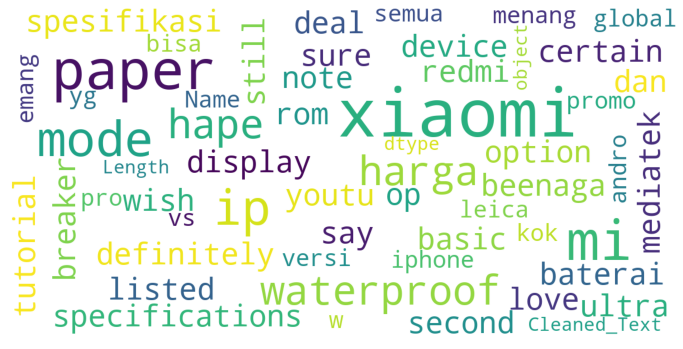

In [ ]:
# wordcloud all xiaomi
show_wordcloud(df['Cleaned_Text'])

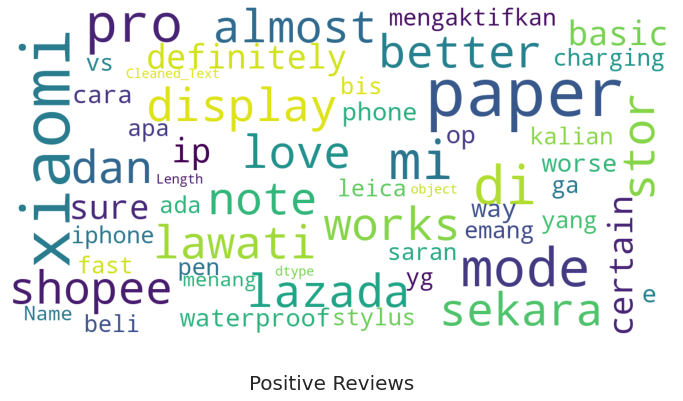

In [ ]:
# wordcloud positif xiaomi
show_wordcloud(df[df['Label'] == 'Positive']['Cleaned_Text'], title = 'Positive Reviews')

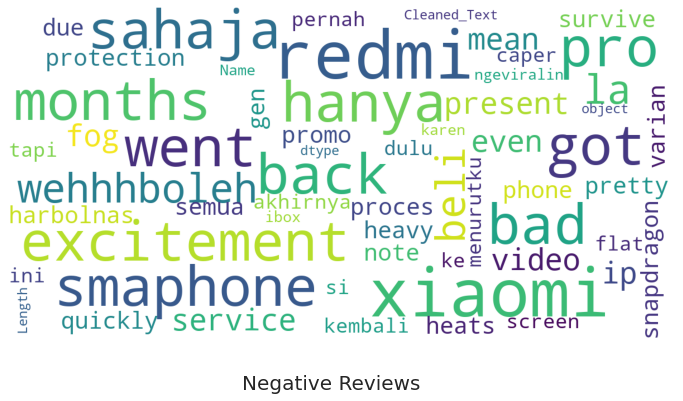

In [ ]:
# wordcloud negatif xiaomi
show_wordcloud(df[df['Label'] == 'Negative']['Cleaned_Text'], title = 'Negative Reviews')

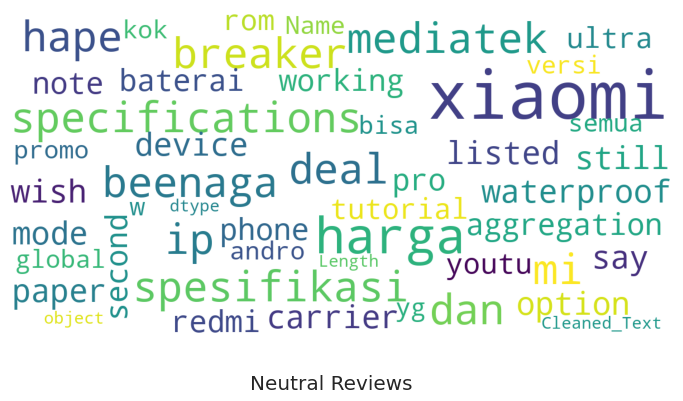

In [ ]:
# wordcloud neutral xiaomi
show_wordcloud(df[df['Label'] == 'Neutral']['Cleaned_Text'], title = 'Neutral Reviews')

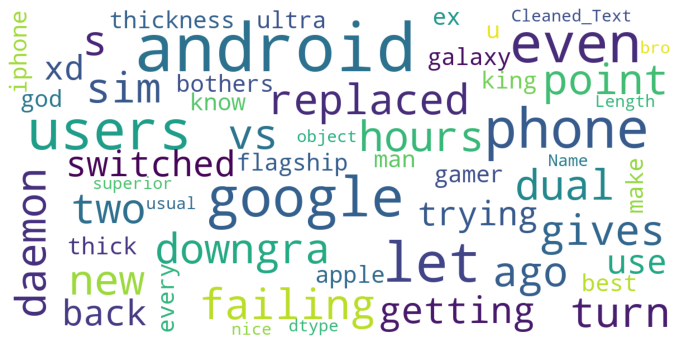

In [ ]:
# wordcloud all samsung
show_wordcloud(df1['Cleaned_Text'])

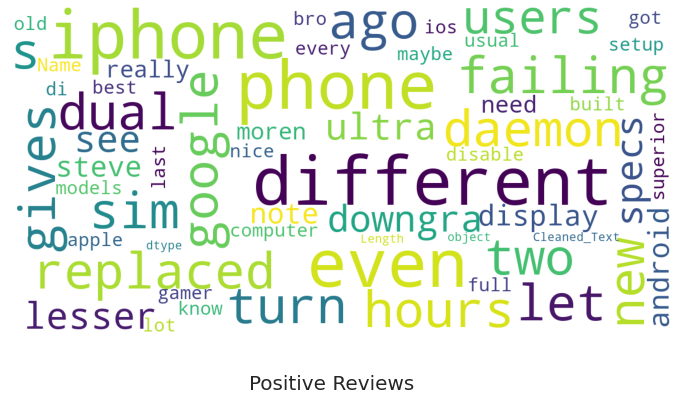

In [ ]:
# wordcloud positif samsung
show_wordcloud(df1[df1['Label'] == 'Positive']['Cleaned_Text'], title = 'Positive Reviews')

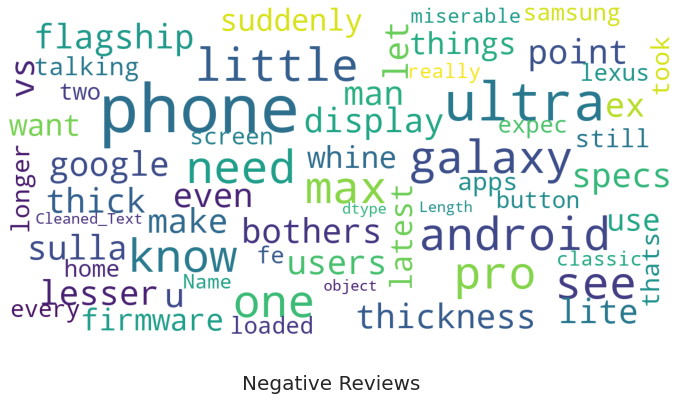

In [ ]:
# wordcloud negatif samsung
show_wordcloud(df1[df1['Label'] == 'Negative']['Cleaned_Text'], title = 'Negative Reviews')

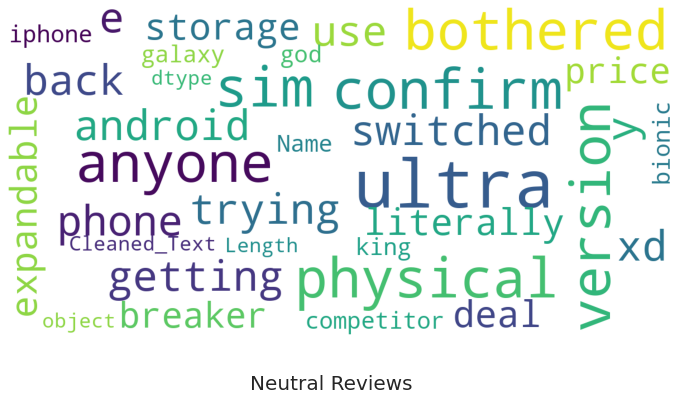

In [ ]:
# wordcloud neutral samsung
show_wordcloud(df1[df1['Label'] == 'Neutral']['Cleaned_Text'], title = 'Neutral Reviews')

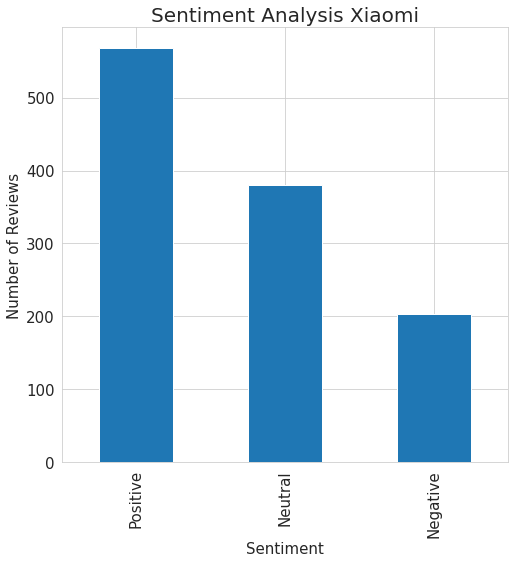

In [ ]:
# Sentiment Analysis Xiaomi
df['Label'].value_counts().plot.bar(figsize=(8, 8), fontsize=15)
plt.title('Sentiment Analysis Xiaomi', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=15)
plt.xlabel('Sentiment', fontsize=15)
plt.show()

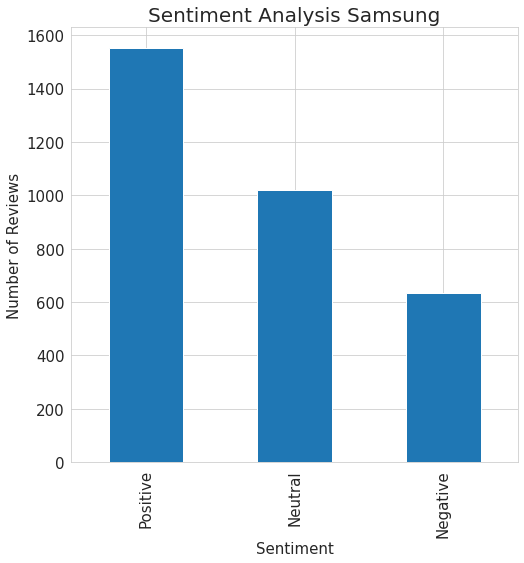

In [ ]:
# Sentiment Analysis Samsung
df1['Label'].value_counts().plot.bar(figsize=(8, 8), fontsize=15)
plt.title('Sentiment Analysis Samsung', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=15)
plt.xlabel('Sentiment', fontsize=15)
plt.show()